In [1]:
#Auticate access to Google Drive
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
!pip install imageio
import imageio

In [0]:
base_dir = '/content/drive/My Drive/chest_xray'

train_dir = os.path.join(base_dir, 'train')
validation_dir =os.path.join(base_dir, 'val')

In [4]:
train_dir

'/content/drive/My Drive/chest_xray/train'

In [5]:
validation_dir

'/content/drive/My Drive/chest_xray/val'

In [0]:
train_stop_dir =os.path.join(train_dir, 'NORMAL')  
train_random_dir =os.path.join(train_dir, 'PNEUMONIA')  
validation_stop_dir =os.path.join(validation_dir, 'NORMAL')
validation_random_dir = os.path.join(validation_dir, 'PNEUMONIA')

In [0]:
num_stop_tr = len(os.listdir(train_stop_dir))
num_random_tr = len(os.listdir(train_random_dir))

num_stop_val = len(os.listdir(validation_stop_dir))
num_random_val = len(os.listdir(validation_random_dir))

total_train = num_stop_tr + num_random_tr
total_val = num_stop_val + num_random_val

In [8]:
print('total training Normal images:', num_stop_tr)
print('total training  PNEUMONIA images:', num_random_tr)

print('total validation Normal images:', num_stop_val)
print('total validation PNEUMONIA images:', num_random_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Normal images: 1342
total training  PNEUMONIA images: 3876
total validation Normal images: 9
total validation PNEUMONIA images: 9
--
Total training images: 5218
Total validation images: 18


In [0]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    zoom_range=0.5
                    )

In [0]:
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [11]:
train_data_gen =train_image_generator.flow_from_directory(
                                                batch_size=50, 
                                                directory=train_dir, 
                                                shuffle=True, 
                                                target_size=(150,150),
                                                class_mode='binary'
                                                )

Found 5216 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=4,
                                                              directory=validation_dir, 
                                                              target_size=(150,150), #(150,150)
                                                              class_mode='binary')

Found 16 images belonging to 2 classes.


In [0]:
#Function to view the class labels
def classLabel(source=None):
        datagen = ImageDataGenerator(rescale=1. / 255)
        data_generator = datagen.flow_from_directory(
        source)
        class_dictionary = data_generator.class_indices
        return data_generator, class_dictionary

In [14]:
labels = classLabel(train_dir)
print(labels)

Found 5216 images belonging to 2 classes.
(<keras_preprocessing.image.directory_iterator.DirectoryIterator object at 0x7f7e71264080>, {'NORMAL': 0, 'PNEUMONIA': 1})


In [0]:
sample_training_images, _ = next(train_data_gen) 

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

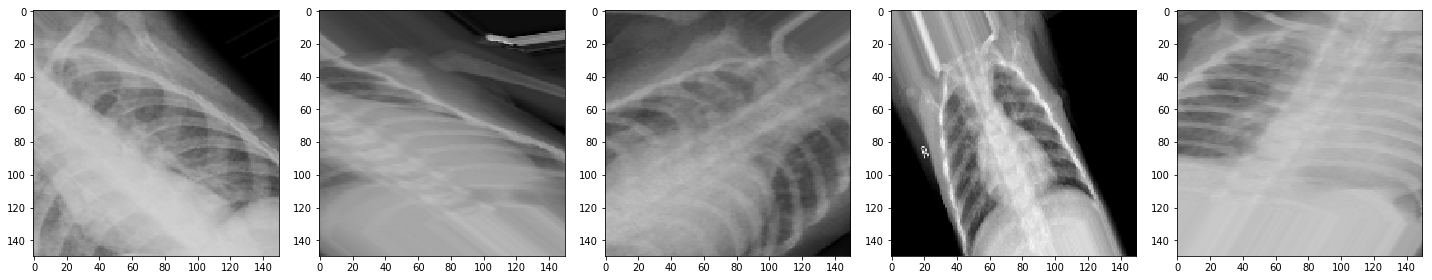

In [17]:
plotImages(sample_training_images[:5])

# **USING CNN**

In [18]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3,))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))
model.summary()

W0803 17:25:00.131617 140182312437632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

In [21]:
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=100,  # 5216 images = batch_size * steps
      epochs=10,
      validation_data=val_data_gen,
      validation_steps=4  )# 16 images = batch_size * steps

Epoch 1/10
100/100 [==============================] - 520s 5s/step - loss: 0.5636 - acc: 0.7406 - val_loss: 0.6778 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 72s 723ms/step - loss: 0.5100 - acc: 0.7553 - val_loss: 0.5936 - val_acc: 0.8125
Epoch 3/10
100/100 [==============================] - 76s 763ms/step - loss: 0.4640 - acc: 0.7684 - val_loss: 0.6403 - val_acc: 0.5625
Epoch 4/10
100/100 [==============================] - 76s 756ms/step - loss: 0.4300 - acc: 0.8030 - val_loss: 0.5319 - val_acc: 0.8750
Epoch 5/10
100/100 [==============================] - 73s 729ms/step - loss: 0.4014 - acc: 0.8112 - val_loss: 0.5560 - val_acc: 0.8750
Epoch 6/10
100/100 [==============================] - 73s 733ms/step - loss: 0.3987 - acc: 0.8242 - val_loss: 0.6052 - val_acc: 0.7500
Epoch 7/10
100/100 [==============================] - 77s 767ms/step - loss: 0.3629 - acc: 0.8378 - val_loss: 0.5475 - val_acc: 0.7500
Epoch 8/10
100/100 [==============================] - 74s

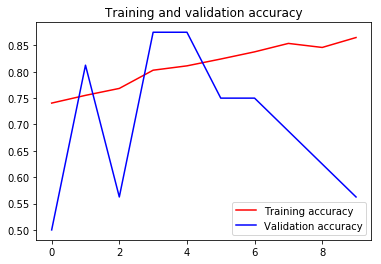

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [23]:
test_generator = validation_image_generator.flow_from_directory(
    directory= '/content/drive/My Drive/chest_xray/test',
        target_size=(150, 150),
        shuffle = False,
        batch_size=1
)

Found 624 images belonging to 2 classes.


In [0]:
filenames = test_generator.filenames
nb_samples = len(filenames)

In [0]:
predict = model.predict_generator(test_generator,steps = nb_samples)

In [26]:
print(predict)

[[0.05807142 0.9419286 ]
 [0.02445058 0.9755494 ]
 [0.06274943 0.93725055]
 ...
 [0.00164362 0.9983564 ]
 [0.02182608 0.9781739 ]
 [0.03689399 0.963106  ]]
